In [1]:
include("ErgodicControl.jl")
using .ErgodicControl

In [2]:
PointsBoundary([])

PointsBoundary(Tuple{Float64, Float64}[])

In [3]:
em = ErgodicManagerR2("single gaussian", K=5, bins=100)

# x0 = [0.4,0.1]
x0 = [0.2,0.2]
N = 40
h = 0.1

0.1

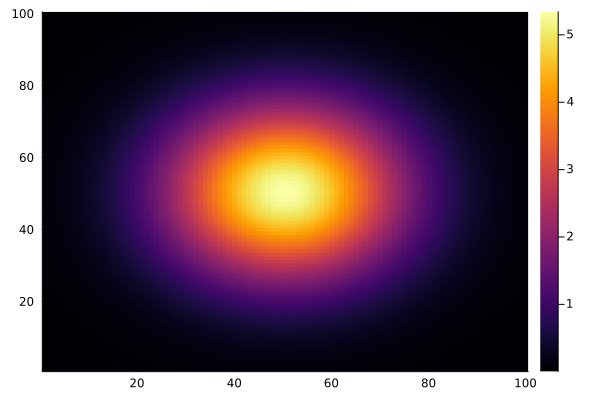

In [4]:
using Plots
heatmap(em.phi)

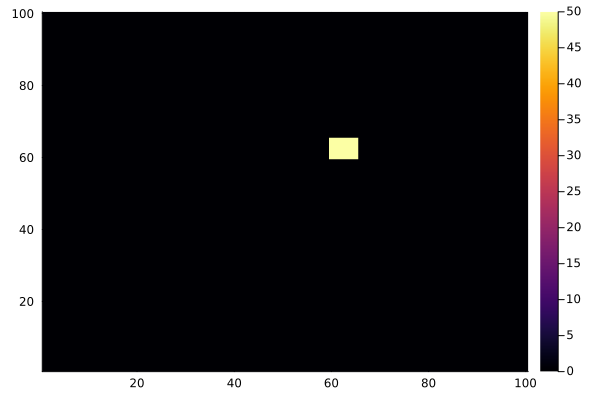

In [8]:
phi = zeros(size(em.phi))
phi[60:65,60:65] .= 50.0

x0 = [0.44,0.33]


points = [(x0[1] - 0.3, x0[2] - 0.3), (x0[1] - 0.3, x0[2]), (x0[1], x0[2]), (x0[1], x0[2]-0.3), (x0[1] - 0.3, x0[2] - 0.3)]
points = interpolate_points(points, 10)
xy_points_boundary = PointsBoundary(points)
em = ErgodicManagerR2(em.domain, phi, 25, xy_points_boundary)

heatmap(em.phi)

In [19]:
x0 = [0.44-.3,0.33-.3]
tm = TrajectoryManager(x0, h, N, ConstantInitializer([0.0,0.0]))
tm.barrier_cost = 1000.

xd, ud = pto_trajectory(em, tm)

--------------------------------------------------------------------------
 iter  |ergodic score |control score |total score |direc deriv |step size
--------------------------------------------------------------------------
 1       3.5776064      0.0000109      3.5776173    -42993.5792775 0.00244
 2       3.6254177      0.0000104      3.6254280    -721.8718070 0.00244
 3       3.6006135      0.0000126      3.6006261    -82.5141089  0.00488
 4       3.5958702      0.0000127      3.5958829    -99.2381128  0.00122
 5       3.5966897      0.0000133      3.5967030    -31.7674358  0.00977
 6       3.5949250      0.0000140      3.5949391    -63.9742311  0.00244
 7       3.6025533      0.0000157      3.6025690    -11.5257998  0.01953
 8       3.5950488      0.0000163      3.5950651    -114.1345636 0.00122
 9       3.5953286      0.0000172      3.5953458    -16.4799456  0.00488
 10      3.5946357      0.0000176      3.5946533    -4.9102077   0.00244
 11      3.5993732      0.0000205      3.599

([[0.14, 0.030000000000000027], [0.14007511986563298, 0.03137597171049875], [0.1401025179715806, 0.03639115301634868], [0.14011047716244013, 0.051025671605334104], [0.14011239300857697, 0.05603756445603041], [0.14011369819229727, 0.05692711492496613], [0.1401159766836601, 0.05674009741562318], [0.1401191836301671, 0.05777163452028228], [0.1401227690223245, 0.06300200155607336], [0.14012623286906292, 0.07766108766244291]  …  [0.1401777557992525, 0.08440913780596723], [0.14017872285032648, 0.08435569627286327], [0.14017910783437534, 0.08429515199607428], [0.14017889770363537, 0.08423560174945875], [0.14017855138563312, 0.0841884381804405], [0.14017958908620018, 0.08416532826138019], [0.14018563102385553, 0.08416951028745591], [0.14020414472426307, 0.08417605103326459], [0.14024928178218987, 0.08409218681050457], [0.14034635533490172, 0.08368356845685451]], [[0.0007511986563297576, 0.013759717104987246], [0.0002739810594761101, 0.05015181305849929], [7.959190859525233e-5, 0.14634518588985

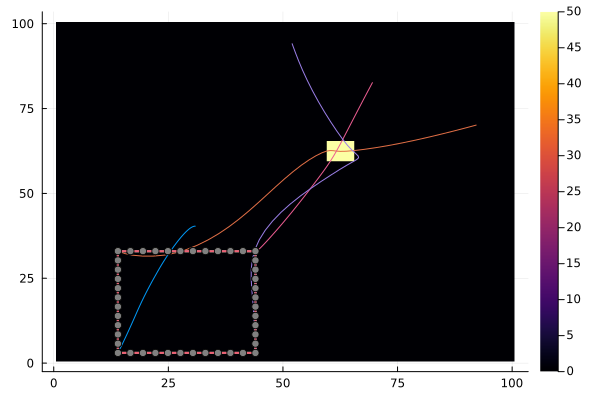

In [20]:
plot!([xd[i][1]*100 for i =1:length(xd)], [xd[i][2]*100 for i =1:length(xd)])
plot!([xd[1][1]*100], [xd[1][2]*100], color=:green)
scatter!([xd[1][1]*100], [xd[1][2]*100])
plot!([xy_points_boundary.points[i][1]*100 for i = 1:length(xy_points_boundary.points)], [xy_points_boundary.points[i][2]*100 for i = 1:length(xy_points_boundary.points)], linewidth=2)
scatter!([xy_points_boundary.points[i][1]*100 for i = 1:length(xy_points_boundary.points)], [xy_points_boundary.points[i][2]*100 for i = 1:length(xy_points_boundary.points)], linewidth=2, color=:gray, legend=false)



In [72]:
em = ErgodicManagerR2(em.domain, phi, 5)
xd_smc, ud_smc = smc_trajectory(em, tm; verbose=true, umax=1.0)

([[0.53, 0.5], [0.43000000000000005, 0.5000000000000001], [0.33000000000000007, 0.5000000000000002], [0.23000000000000007, 0.5000000000000002], [0.13000000000000006, 0.5000000000000002], [0.030000000000000054, 0.5000000000000001], [0.13000000000000006, 0.4999999999999994], [0.23000000000000007, 0.49999999999999784], [0.33000000000000007, 0.4999999999999951], [0.43000000000000005, 0.4999999999999913]  …  [2.5252771739045956, 0.7358213295319177], [2.564184005536913, 0.8279422199549618], [2.6128989524210215, 0.9152740809798963], [2.7015159945449625, 0.9616100264780049], [2.8014458273761087, 0.957864561174583], [2.898587247840667, 0.9341254704142388], [2.9631841066750524, 0.8577890713065359], [2.9542775045634433, 0.7581864988556927], [2.910004814605242, 0.668520848108793], [2.8406804971716126, 0.5964504726944704]], [[-1.0, 7.435098295962948e-16], [-1.0, 1.4235539011556096e-15], [-1.0, 4.636608127621785e-16], [-1.0, -4.220624201228706e-16], [-1.0, -1.581710038384762e-15], [1.0, -7.299936268

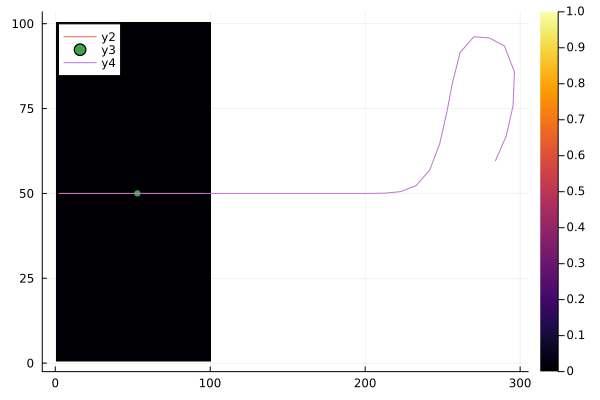

In [73]:
plot!([xd_smc[i][1]*100 for i =1:length(xd)], [xd_smc[i][2]*100 for i =1:length(xd)])
